# Project workflow.
- The project is a machine learning project that aims to predict the amount of money paid as premiums for an insuarnace company.
- This is a supervised regression task.

1. Import the necessary libraries.
2. Problem definition and desired outcome.
3. Data collection (Use the available dataset)
4. Data cleaning and preprocessing.
5. EDA analysis.
6. Feature engineering and feature selection.
7. ML model selection.
8. Model training.
9. Model evaluation and deployment.

In [79]:
# Imported all the needed libraries here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [80]:
df=pd.read_csv("Health_insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Data cleaning and processing.

In [81]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [82]:
df.duplicated().sum()   


1

In [83]:
df.drop_duplicates(inplace=True)

In [84]:
df.dtypes
# Data is of the right type, no need to change anything.

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [85]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [86]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


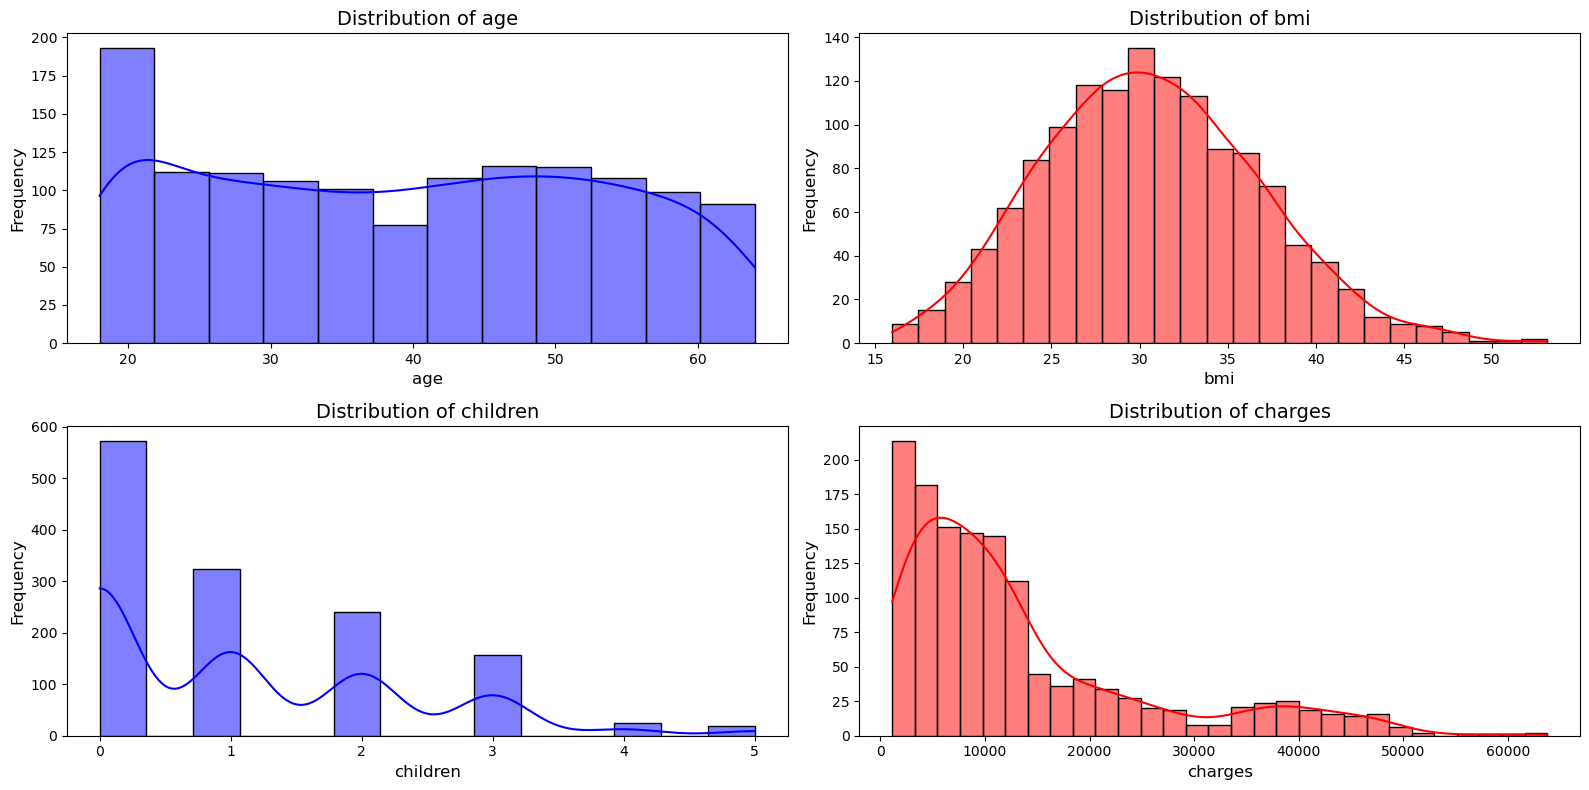

In [87]:

plt.figure(figsize=(16, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

columns = [("age", "blue"), ("bmi", "red"), ("children", "blue"), ("charges", "red")]

for i, (col, color) in enumerate(columns, 1):
    plt.subplot(2, 2, i)  
    sns.histplot(data=df, x=col, kde=True, color=color)
    plt.title(f"Distribution of {col}", fontsize=14)  
    plt.xlabel(col, fontsize=12) 
    plt.ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

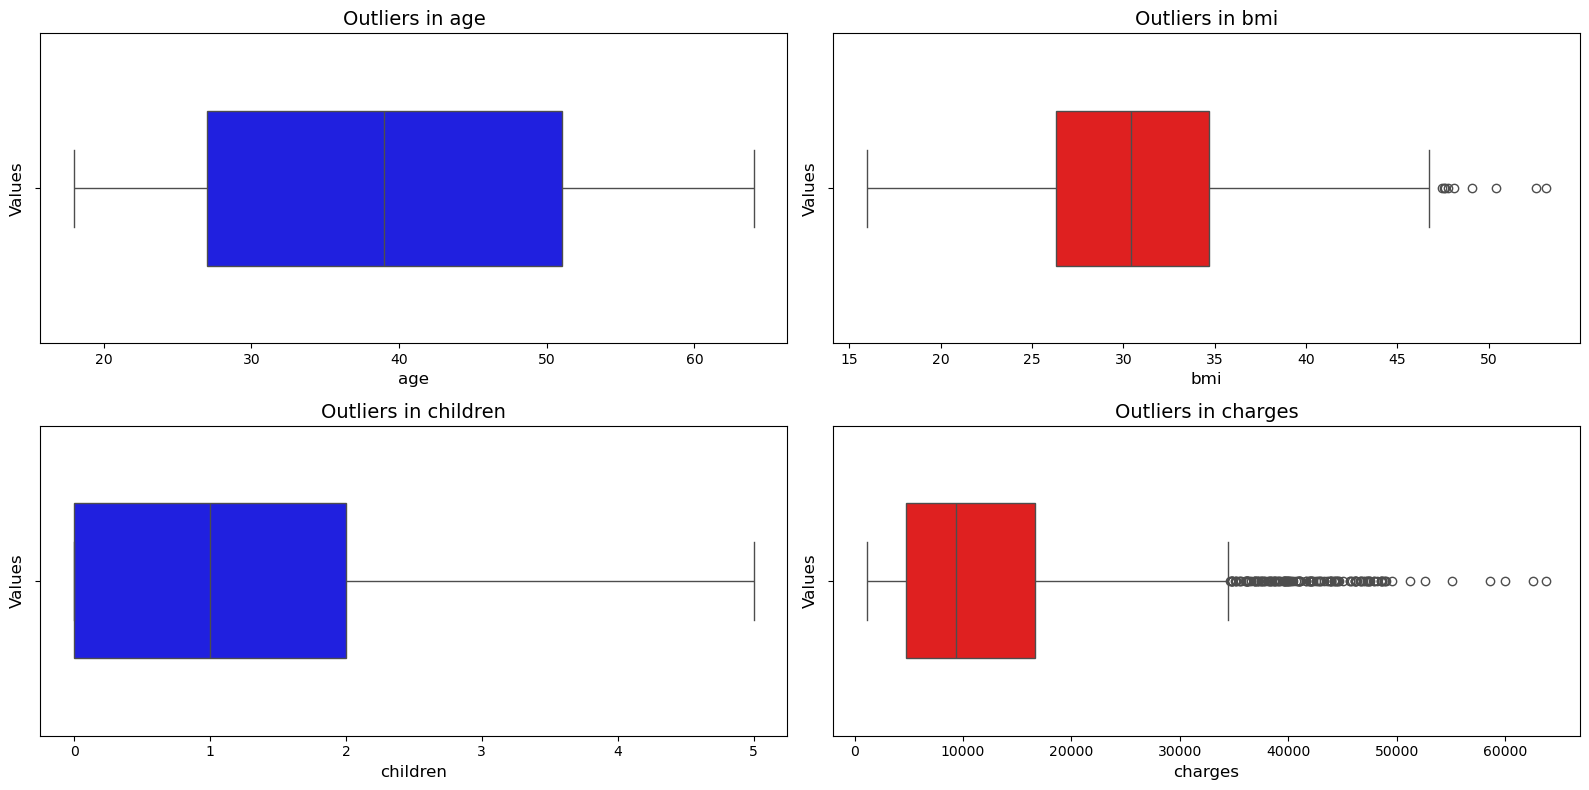

In [88]:
plt.figure(figsize=(16, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

columns = [("age", "blue"), ("bmi", "red"), ("children", "blue"), ("charges", "red")]

for i, (col, color) in enumerate(columns, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(data=df, x=col, color=color, width=0.5)  
    plt.title(f"Outliers in {col}", fontsize=14)
    plt.xlabel(col, fontsize=12) 
    plt.ylabel("Values", fontsize=12)

plt.tight_layout()
plt.show()

In [89]:
Q1=df["charges"].quantile(0.25)
Q3=df["charges"].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers_charges=df[(df["charges"]<lower_bound) | (df["charges"]>upper_bound)]
outliers_charges.head(10)


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.75770
19,30,male,35.30,0,yes,southwest,36837.46700
23,34,female,31.92,1,yes,northeast,37701.87680
29,31,male,36.30,2,yes,southwest,38711.00000
30,22,male,35.60,0,yes,southwest,35585.57600
34,28,male,36.40,1,yes,southwest,51194.55914
38,35,male,36.67,1,yes,northeast,39774.27630
39,60,male,39.90,0,yes,southwest,48173.36100
49,36,male,35.20,1,yes,southeast,38709.17600
53,36,male,34.43,0,yes,southeast,37742.57570


- I will work with the outliers as some such as a high BMI might indicate obesity situation.
- The outliers in charges indicate that smokers and older people tend to pay much more and this condition cannot be treated as an outlier.

# Data visualization to get indepth analysis.

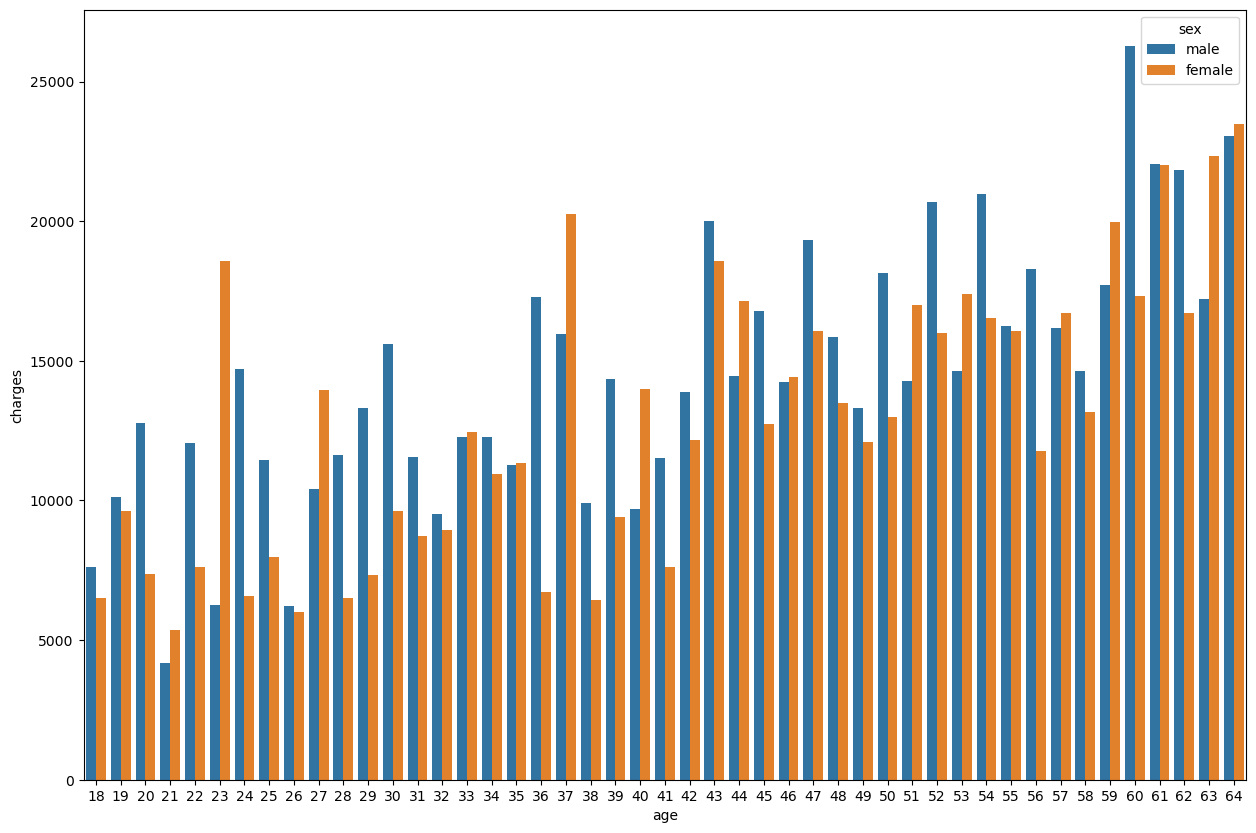

In [90]:
age=df.groupby(["age","sex"])["charges"].mean().reset_index().sort_values(by="charges",ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x="age",y="charges",data=age,hue="sex")
plt.show()

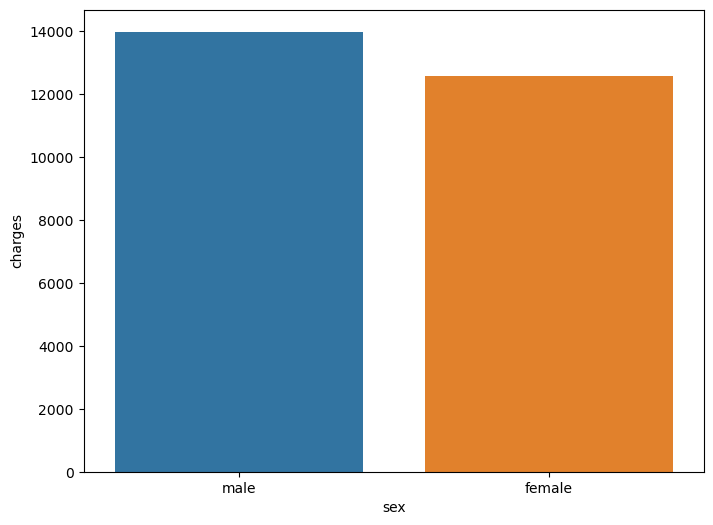

In [91]:
sex=df.groupby("sex")["charges"].mean().reset_index().sort_values(by="charges",ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="sex",y="charges",data=sex,hue="sex")
plt.show()

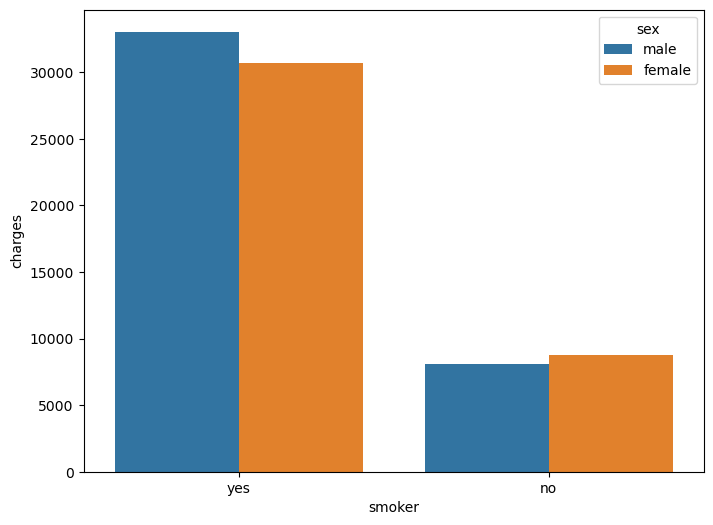

In [92]:
smoker=df.groupby(["smoker","sex"])["charges"].mean().reset_index().sort_values(by="charges",ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="smoker",y="charges",data=smoker,hue="sex")
plt.show()

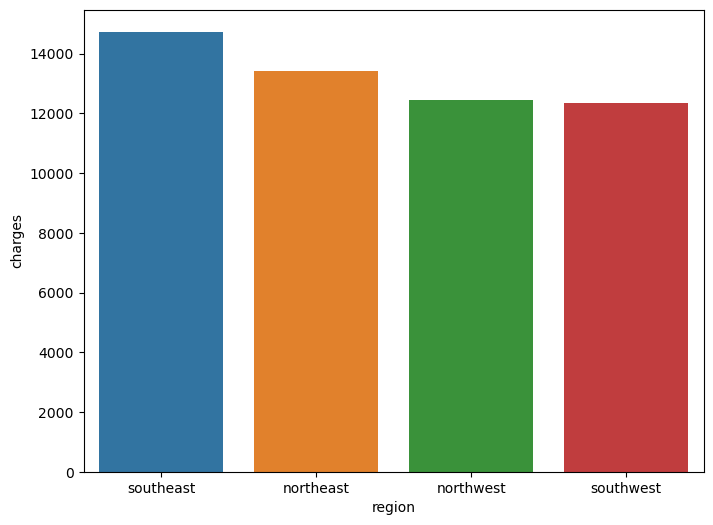

In [93]:
smoker=df.groupby(["region"])["charges"].mean().reset_index().sort_values(by="charges",ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="region",y="charges",data=smoker,hue="region")
plt.show()

# Encoding the features

In [94]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [95]:
#Encoding categorical variables to continious variable.
df["sex"]=df["sex"].map({"female":0,"male":1})
df["smoker"]=df["smoker"].map({"no":0,"yes":1})
df["region"]=df["region"].map({"southwest":0,"southeast":1,"northwest":2,"northeast":3})


In [96]:
df["sex"] = df["sex"].astype("category")

In [97]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker         int64
region         int64
charges      float64
dtype: object

In [98]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


# Machine Learning process.

In [99]:
# Splitting the data into dependent and independent variables.
X=df.drop(["charges"],axis=1)
y=df["charges"]

- All the features meet the variance threshold so I will use all features

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [101]:
scaler =  StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(X_train_scaled.head())
 

        age       sex       bmi  children    smoker    region
0 -1.157680  0.971409 -0.996928 -0.907908 -0.500292  1.383946
1 -1.300619  0.971409 -0.792762  0.766904 -0.500292  1.383946
2  0.914926 -1.029432  1.154664  0.766904 -0.500292  0.477983
3  1.701087  0.971409  1.806837 -0.907908 -0.500292 -0.427981
4  0.557580 -1.029432 -0.651417  0.766904 -0.500292  1.383946


MAE training data: 4181.321578104919
MAE testing data: 4182.353155288301
R2 training data: 0.7297182858804965
R2 testing data: 0.806846632262911
Cross Validation Scores:  [0.72897693 0.71554602 0.77299395 0.69172728 0.71051424]
Mean Cross Validation Score:  0.7239516846559859
Actual values:
 [ 8688.86  5708.87 11436.74 38746.36  4463.21  9304.7  38511.63  2150.47
  7345.73 10264.44]
Predicted values:
 [ 8080.45  5592.87 14378.3  31731.82  9158.36 13361.01 30257.66  1308.65
 10849.43 11375.55]


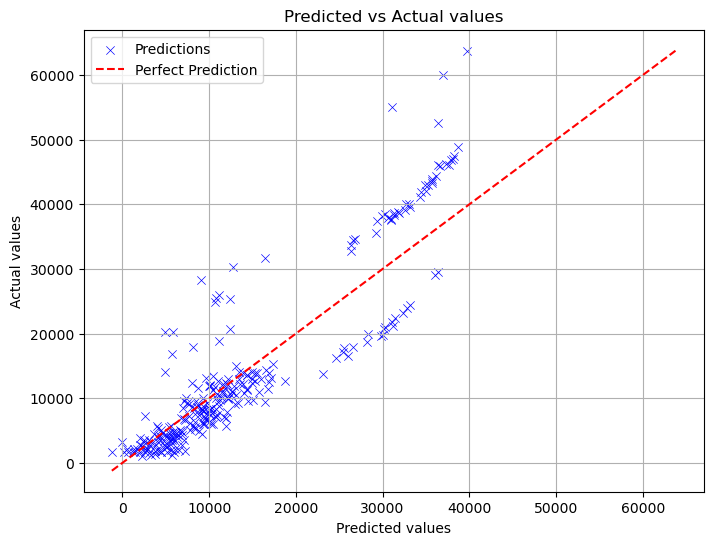

In [103]:
lr = LinearRegression()

# Training the model
lr.fit(X_train_scaled, y_train)

# Making predictions on training and testing data
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

# Evaluating the model
print("MAE training data:", mean_absolute_error(y_train, y_train_pred))
print("MAE testing data:", mean_absolute_error(y_test, y_test_pred))

print("R2 training data:", r2_score(y_train, y_train_pred))
print("R2 testing data:", r2_score(y_test, y_test_pred))

# Cross Validation to evaluate the model's performance
folds = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(lr, X_train_scaled, y_train, cv=folds)
print("Cross Validation Scores: ", cross_val_scores)
print("Mean Cross Validation Score: ", cross_val_scores.mean())

print("Actual values:\n", y_test.values[:10].round(2))
print("Predicted values:\n", y_test_pred[:10].round(2))

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_pred,y=y_test,marker="x",label="Predictions",color="blue")
# creating a line for the perfect predictions
min_val = min(min(y_test), min(y_test_pred))
max_val = max(max(y_test), max(y_test_pred))
plt.plot([min_val,max_val],[min_val,max_val],"--",color="red",label="Perfect Prediction")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Predicted vs Actual values")
plt.grid()
plt.legend()
plt.show()


- Any point on the line → model prediction exactly equals actual value.

- Any point above the line → the model underpredicted (prediction too low).

- Any point below the line → the model overpredicted (prediction too high).

MAE training data: 2370.7076094910994
MAE testing data: 2598.9898844524137
R2 training data: 0.8671239459890718
R2 testing data: 0.893156079326991
Cross Validation Scores:  [0.79798647 0.82503854 0.88460278 0.8041687  0.84067556]
Mean Cross Validation Score:  0.8304944101185002
Actual values:
 [ 8688.86  5708.87 11436.74 38746.36  4463.21  9304.7  38511.63  2150.47
  7345.73 10264.44]
Predicted values:
 [12504.99  4098.15 10370.82 42308.45  6703.79 10370.82 35238.58  1827.31
  8761.53 10370.82]


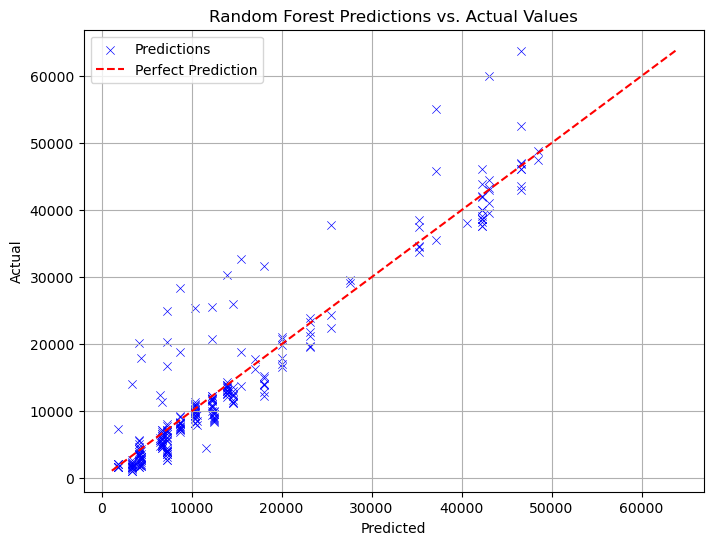

In [104]:
dtree = DecisionTreeRegressor(max_depth=5,min_samples_leaf=3,min_samples_split=2, random_state=42)

# Training the model
dtree.fit(X_train_scaled, y_train)

# Making predictions on training and testing data
y_train_pred = dtree.predict(X_train_scaled)
y_test_pred = dtree.predict(X_test_scaled)

# Evaluating the model
print("MAE training data:", mean_absolute_error(y_train, y_train_pred))
print("MAE testing data:", mean_absolute_error(y_test, y_test_pred))

print("R2 training data:", r2_score(y_train, y_train_pred))
print("R2 testing data:", r2_score(y_test, y_test_pred))

# Cross Validation to evaluate the model's performance
folds = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(dtree, X_train_scaled, y_train, cv=folds)
print("Cross Validation Scores: ", cross_val_scores)
print("Mean Cross Validation Score: ", cross_val_scores.mean())

print("Actual values:\n", y_test.values[:10].round(2))
print("Predicted values:\n", y_test_pred[:10].round(2))

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_pred, y=y_test, marker="x", label="Predictions", color="blue")
# Add 45-degree reference line
max_val = max(max(y_test), max(y_test_pred))
min_val = min(min(y_test), min(y_test_pred))
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Perfect Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Predictions vs. Actual Values")
plt.grid(True)
plt.legend()
plt.show()



Bagging Regressor Performance:
MAE: 2571.952604714179
R²: 0.8825294274287915

Random Forest Regressor Performance:
MAE: 2594.082751801865
R²: 0.8815153111075662

Cross Validation (Bagging): [0.78297368 0.82161083 0.87662644 0.77841522 0.82835704]
Mean CV Score (Bagging): 0.817596642823213

Cross Validation (Random Forest): [0.77646757 0.81820473 0.8761512  0.78024937 0.82723314]
Mean CV Score (Random Forest): 0.8156611990773615


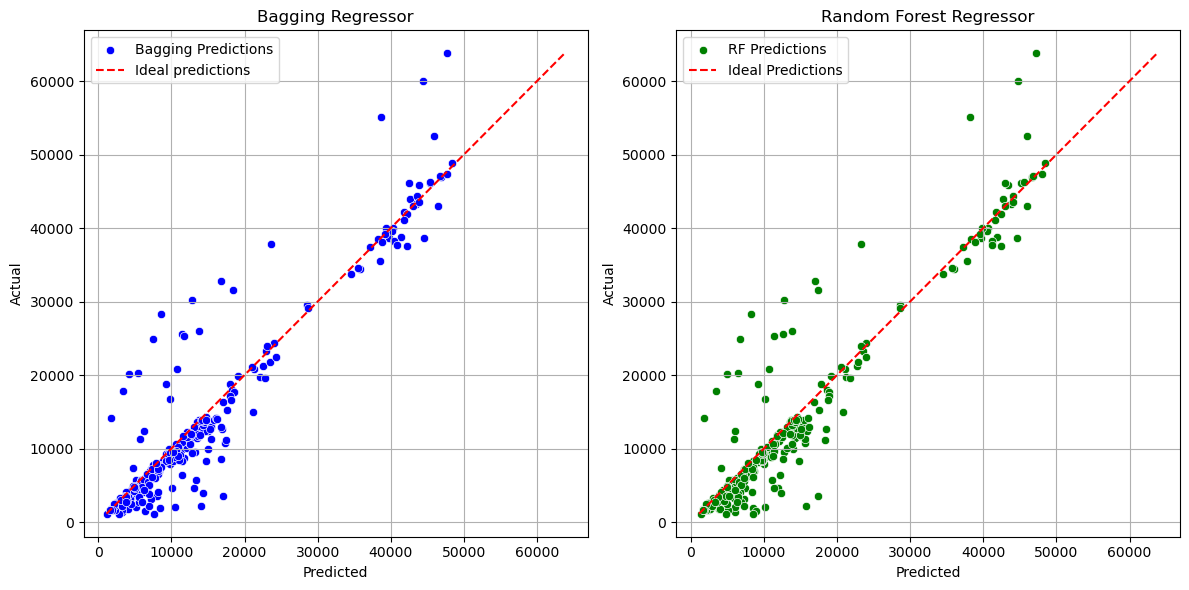

In [105]:
# Initializing the models
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    max_samples=0.8,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Training the models
bagging_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

#  Making predictions
y_pred_bagging = bagging_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluating the models
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R²:", r2_score(y_true, y_pred))

evaluate_model("Bagging Regressor", y_test, y_pred_bagging)
evaluate_model("Random Forest Regressor", y_test, y_pred_rf)

# Cross Validation to check on generalization
folds = KFold(n_splits=5, shuffle=True, random_state=42)
cv_bagging = cross_val_score(bagging_model, X_train_scaled, y_train, cv=folds)
cv_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=folds)

print("\nCross Validation (Bagging):", cv_bagging)
print("Mean CV Score (Bagging):", cv_bagging.mean())

print("\nCross Validation (Random Forest):", cv_rf)
print("Mean CV Score (Random Forest):", cv_rf.mean())

# Visualizing the predictions
plt.figure(figsize=(12, 6))

# Bagging
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_bagging, y=y_test, label="Bagging Predictions", color="blue")
min_val = min(y_test.min(), y_pred_bagging.min())
max_val = max(y_test.max(), y_pred_bagging.max())
plt.plot([min_val, max_val], [min_val, max_val], "--", color="red", label="Ideal predictions")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Bagging Regressor")
plt.legend()
plt.grid()

# Random Forest
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_rf, y=y_test, label="RF Predictions", color="green")
min_val = min(y_test.min(), y_pred_rf.min())
max_val = max(y_test.max(), y_pred_rf.max())
plt.plot([min_val, max_val], [min_val, max_val], "--", color="red", label="Ideal Predictions")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Regressor")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [106]:
# Saving the rforest model and scaler for future use
joblib.dump(scaler, "scaler.pkl")
joblib.dump(rf_model, "rf_model.pkl")


['rf_model.pkl']

Both models perform well and comparably. Bagging may have a slight edge here, which could be due to the nature of the dataset. Either model is a valid choice.

## Using a deep neural network

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 310364160.0000 - mae: 13154.0928 - val_loss: 303866240.0000 - val_mae: 12599.6709
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 307528544.0000 - mae: 12954.4482 - val_loss: 300602944.0000 - val_mae: 12490.1836
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 281970176.0000 - mae: 12580.6426 - val_loss: 271993696.0000 - val_mae: 11560.6621
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 230100608.0000 - mae: 10823.1758 - val_loss: 146186560.0000 - val_mae: 7266.0679
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 99277912.0000 - mae: 6190.1104 - val_loss: 56676372.0000 - val_mae: 6297.4526
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 46326120.0000 - mae: 5703.2417 - val_loss: 42268324.0000 - val_mae: 4647.7837
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40915128.0000 - mae: 4624.8379 - val_loss: 37602196.0000 - val_mae: 4370.4619
Epoch 8/100
27/27 ━━━━━━━

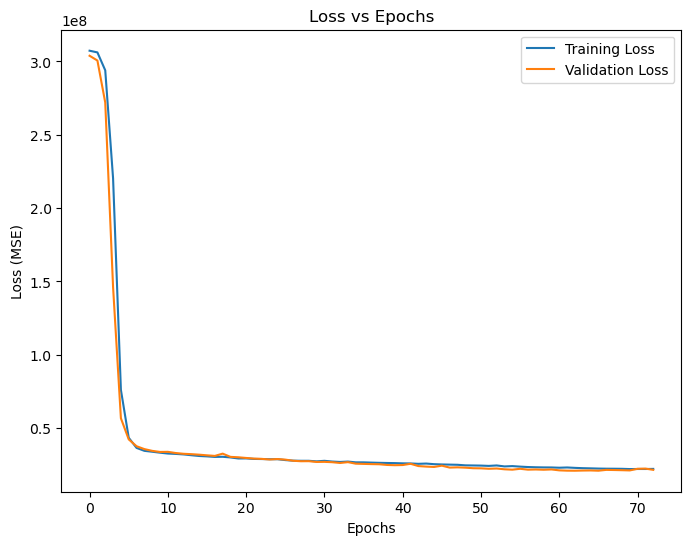

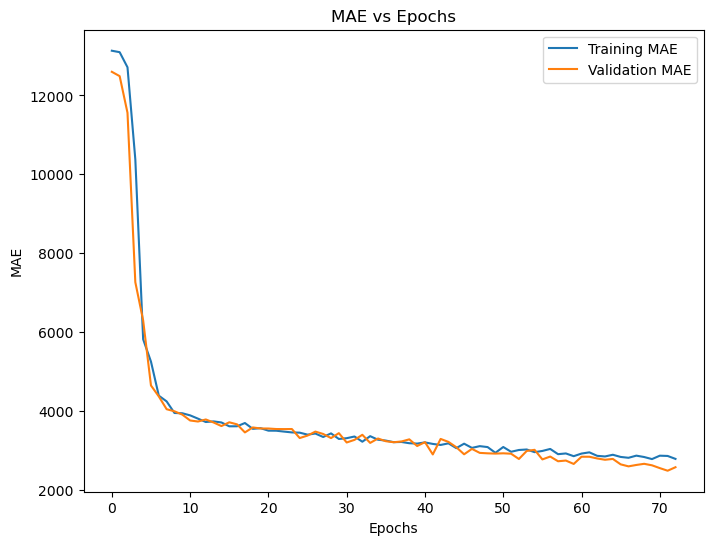

In [107]:
# Build the model
model = Sequential()
# Input layer
model.add(Dense(256, activation="relu", input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(128, activation="relu", input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
# Output layer
model.add(Dense(1, activation="linear"))  

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=["mae"])

# Early stopping
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Predict
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate
print("MAE (Train):", mean_absolute_error(y_train, y_train_pred))
print("MAE (Test):", mean_absolute_error(y_test, y_test_pred))
print("R² (Train):", r2_score(y_train, y_train_pred))
print("R² (Test):", r2_score(y_test, y_test_pred))

# Plotting training history
plt.figure(figsize=(8, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history["mae"], label="Training MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.title("MAE vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [108]:
# Saving the model
model.save("DNN_model.h5")

## Conclusion

Based on the analysis, the Random Forest Regressor seems to be the most balanced model for deployment as it strikes a good trade-off between accuracy (R²) and error (MAE). It performs well on both the training and testing data while having stable generalization performance. The Bagging Regressor is also a strong contender, but Random Forest typically offers slightly better interpretability and robustness.

Therefore, for deployment, I would recommend the Random Forest Regressor due to its lower error, reasonable R², and general reliability across different datasets.